Range of selling prices: (5000, 760000)
Median selling price: 45000.0
Most common seller type: Individual
Number of bikes with >50,000 km driven: 170
Average km_driven for each ownership type:
 owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64
Proportion of bikes from 2015 or older: 0.57
Missing values across the dataset:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
Highest ex_showroom_price: 1278000.0 for bike: Harley-Davidson Street Bob
Total bikes listed by each seller type:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


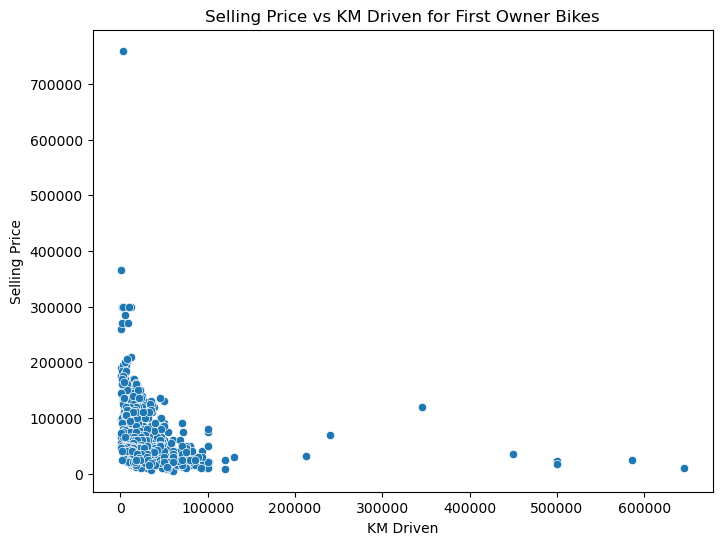

Outliers removed from km_driven column.


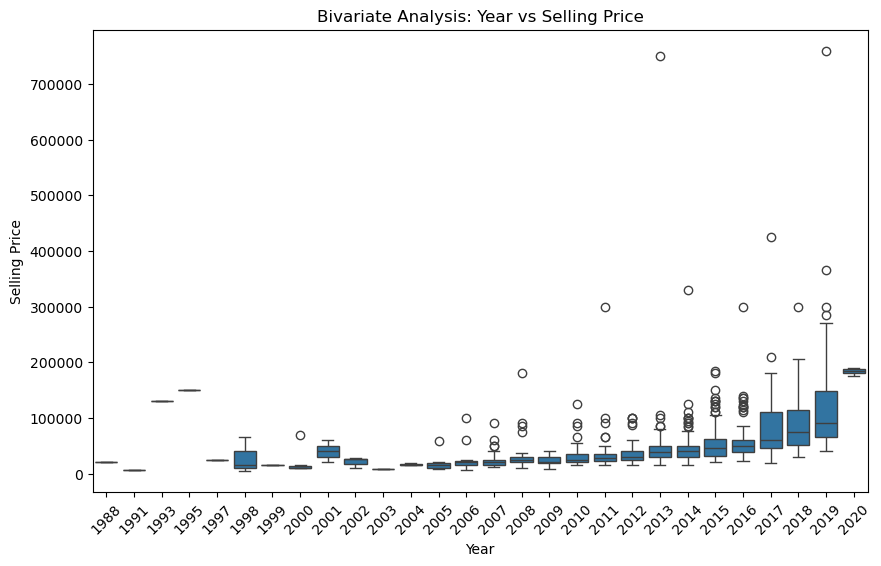

Average depreciation in selling price based on age:
 age
4     183333.333333
5     119689.511628
6      87660.374046
7      78962.121212
8      57924.126214
9      56313.131313
10     49121.348315
11     51802.816901
12     36157.560606
13     35931.017241
14     32350.877193
15     22934.782609
16     36404.000000
17     27768.181818
18     23821.052632
19     16978.571429
20     16000.000000
21      8000.000000
22     20666.666667
23     40000.000000
24     20833.333333
25     15000.000000
26     28333.333333
27     25000.000000
29    150000.000000
31    130000.000000
33      6000.000000
36     20000.000000
Name: selling_price, dtype: float64
Bikes priced significantly above average for their manufacturing year:
                                       name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield

<function matplotlib.pyplot.show(close=None, block=None)>

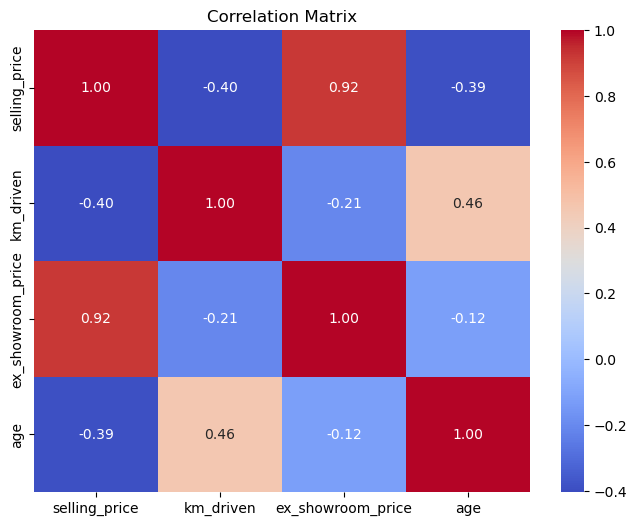

In [2]:
# EDA-1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset
df = pd.read_csv(r"D:\PW_SKILLS\Modules\Machine_Learning\Module_03\BIKE DETAILS.csv")

# 1. Range of selling prices
selling_price_range = df['selling_price'].min(), df['selling_price'].max()
print(f"Range of selling prices: {selling_price_range}")

# 2. Median selling price
median_selling_price = df['selling_price'].median()
print(f"Median selling price: {median_selling_price}")

# 3. Most common seller type
most_common_seller_type = df['seller_type'].mode()[0]
print(f"Most common seller type: {most_common_seller_type}")

# 4. Bikes with more than 50,000 kilometers driven
bikes_above_50k_km = df[df['km_driven'] > 50000].shape[0]
print(f"Number of bikes with >50,000 km driven: {bikes_above_50k_km}")

# 5. Average km_driven for each ownership type
average_km_by_owner = df.groupby('owner')['km_driven'].mean()
print("Average km_driven for each ownership type:\n", average_km_by_owner)

# 6. Proportion of bikes from 2015 or older
year_2015_or_older = df[df['year'] <= 2015].shape[0]
total_bikes = df.shape[0]
proportion_2015_or_older = year_2015_or_older / total_bikes
print(f"Proportion of bikes from 2015 or older: {proportion_2015_or_older:.2f}")

# 7. Trend of missing values
missing_values = df.isnull().sum()
print("Missing values across the dataset:\n", missing_values)

# 8. Highest ex_showroom_price and corresponding bike
highest_ex_showroom_price = df['ex_showroom_price'].max()
highest_ex_showroom_bike = df[df['ex_showroom_price'] == highest_ex_showroom_price]['name'].values[0]
print(f"Highest ex_showroom_price: {highest_ex_showroom_price} for bike: {highest_ex_showroom_bike}")

# 9. Total bikes listed by each seller type
total_bikes_by_seller = df['seller_type'].value_counts()
print("Total bikes listed by each seller type:\n", total_bikes_by_seller)

# 10. Relationship between selling_price and km_driven for first-owner bikes
first_owner_bikes = df[df['owner'] == '1st owner']
plt.figure(figsize=(8, 6))
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price')
plt.title("Selling Price vs KM Driven for First Owner Bikes")
plt.xlabel("KM Driven")
plt.ylabel("Selling Price")
plt.show()

# 11. Remove outliers in km_driven using IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print("Outliers removed from km_driven column.")

# 12. Bivariate analysis: Year vs Selling Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='selling_price')
plt.title("Bivariate Analysis: Year vs Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.xticks(rotation=45)
plt.show()

# 13. Average depreciation in selling price based on age
current_year = 2024
df['age'] = current_year - df['year']
average_depreciation = df.groupby('age')['selling_price'].mean()
print("Average depreciation in selling price based on age:\n", average_depreciation)

# 14. Bikes priced significantly above average for their manufacturing year
average_price_by_year = df.groupby('year')['selling_price'].mean()
df['above_average'] = df.apply(lambda row: row['selling_price'] > average_price_by_year[row['year']], axis=1)
high_priced_bikes = df[df['above_average']]
print("Bikes priced significantly above average for their manufacturing year:\n", high_priced_bikes[['name', 'year', 'selling_price']])

# 15. Correlation matrix and heatmap
correlation_matrix = df[['selling_price', 'km_driven', 'ex_showroom_price', 'age']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB

First 5 Rows:
          Car_id      Date Customer N

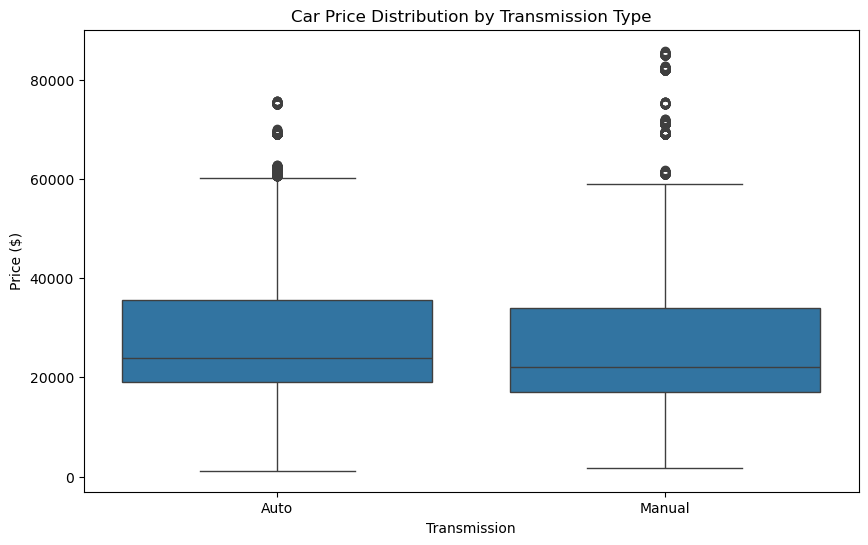

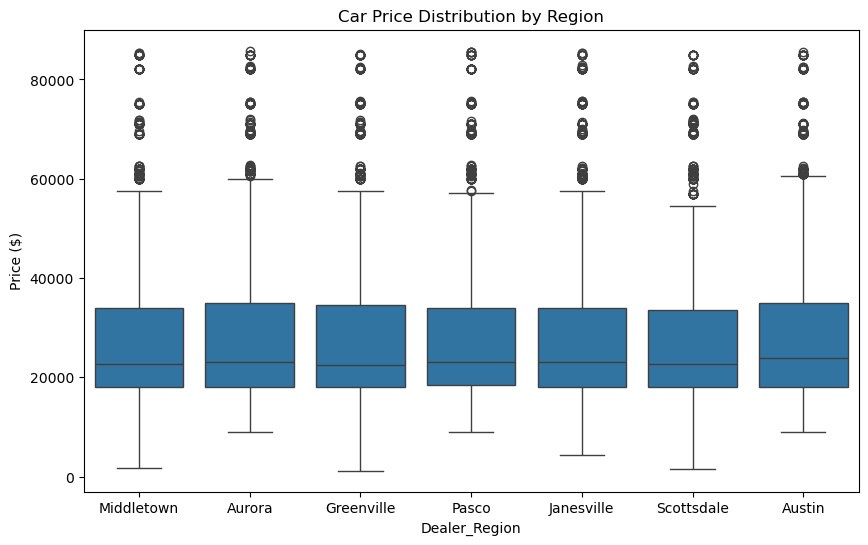

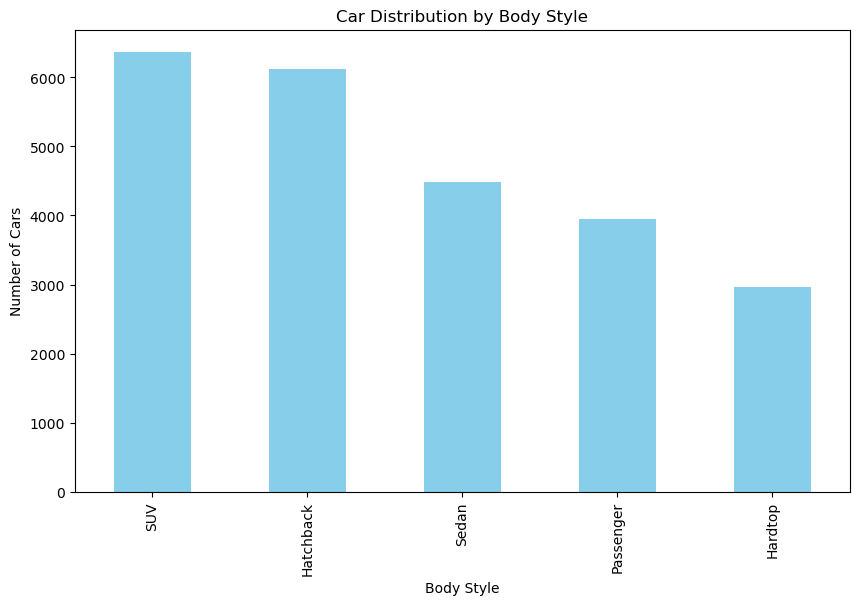


Average Selling Price by Gender and Income Bracket:
 Annual Income  (10079.999, 386000.0]  (386000.0, 735000.0]  \
Gender                                                       
Female                  28059.801521          28353.154717   
Male                    27924.524014          27837.224550   

Annual Income  (735000.0, 1175750.0]  (1175750.0, 11200000.0]  
Gender                                                         
Female                  28309.448449             28402.914851  
Male                    28283.473409             28091.421784  

Car Price Distribution by Region:
                 count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville

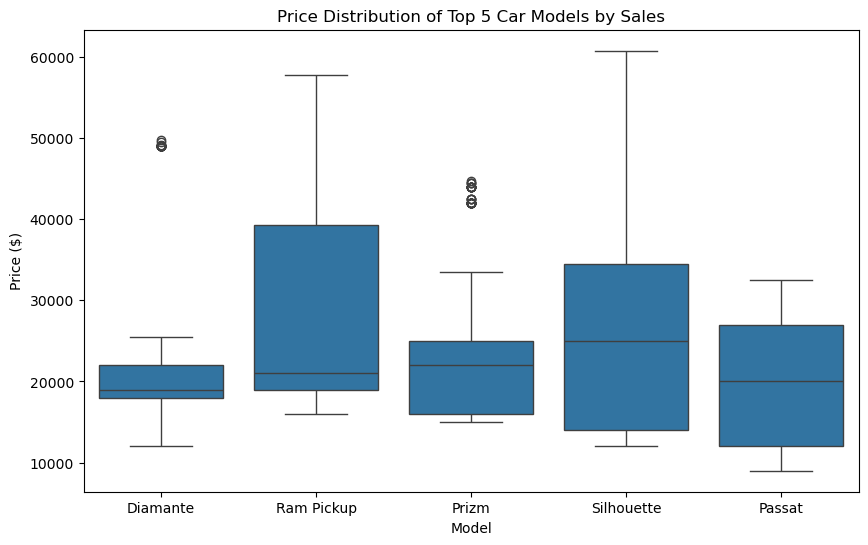


Car Price Variation by Engine Size and Color:
 Color                             Black    Pale White           Red
Engine                                                             
DoubleÂ Overhead Camshaft  12418.674126  14402.413401  13499.354247
Overhead Camshaft          17457.405345  13000.103061  17346.642554


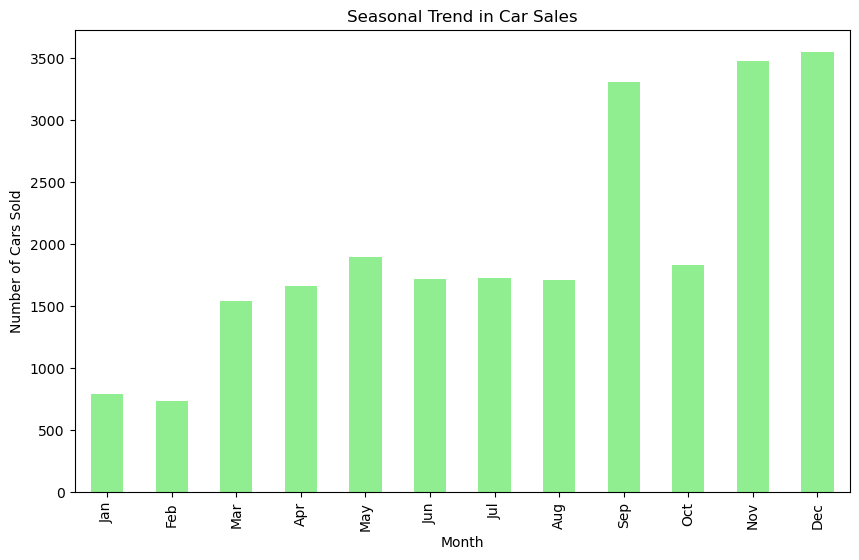

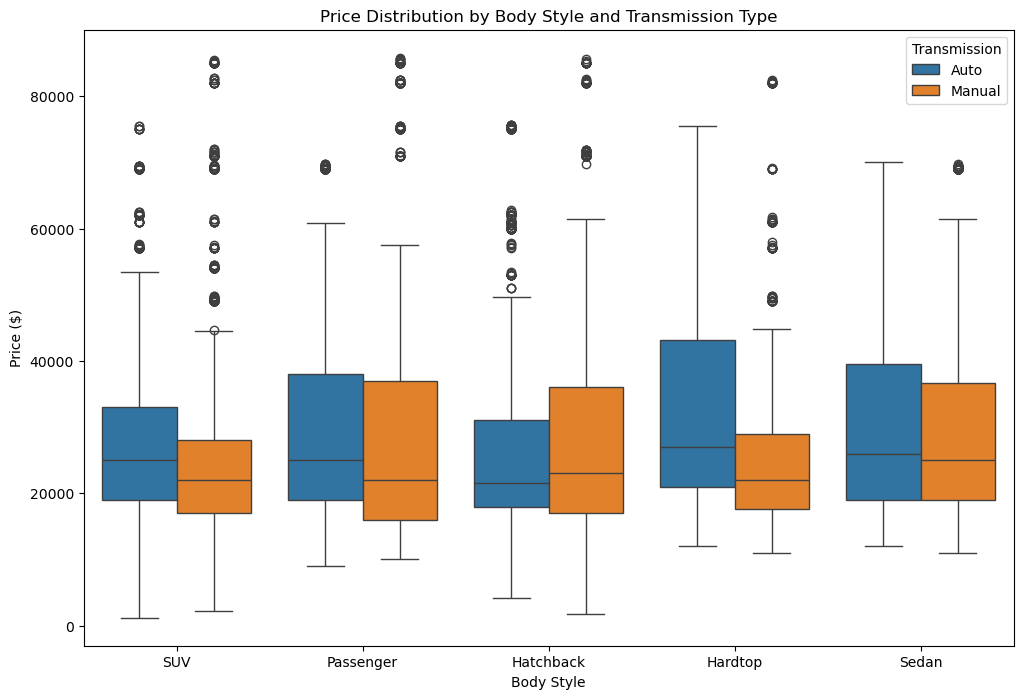

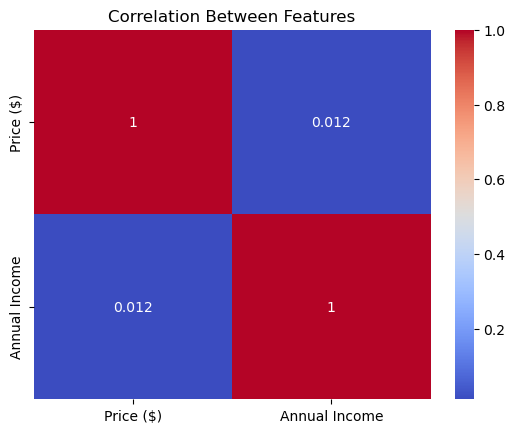


Average Car Price by Model and Engine Type:
 Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117                NaN
3000GT                 22764.326923       21770.659864
300M                   21394.888889                NaN
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]


In [6]:
# EDA-2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading dataset
data_path = r"D:\PW_SKILLS\Modules\Machine_Learning\Module_03\Car Sale.csv"
data = pd.read_csv(data_path)

# Display basic information about the dataset
print("Dataset Info:")
data.info()
print("\nFirst 5 Rows:\n", data.head())

# Clean and preprocess data
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Annual Income'] = pd.to_numeric(data['Annual Income'], errors='coerce')
data['Price ($)'] = pd.to_numeric(data['Price ($)'], errors='coerce')

# Drop rows with missing critical values
data.dropna(subset=['Date', 'Annual Income', 'Price ($)'], inplace=True)

# 1. Average selling price of cars for each dealer
avg_price_per_dealer = data.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print("\nAverage Selling Price per Dealer:\n", avg_price_per_dealer)

# 2. Car brand with the highest variation in prices
price_variation = data.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
highest_variation_brand = price_variation.idxmax()
print("\nCar Brand with Highest Price Variation:", highest_variation_brand)
print(price_variation)

# 3. Distribution of car prices for each transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=data)
plt.title('Car Price Distribution by Transmission Type')
plt.show()

# 4. Distribution of car prices across different regions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=data)
plt.title('Car Price Distribution by Region')
plt.show()

# 5. Distribution of cars based on body styles
body_style_distribution = data['Body Style'].value_counts()
plt.figure(figsize=(10, 6))
body_style_distribution.plot(kind='bar', color='skyblue')
plt.title('Car Distribution by Body Style')
plt.ylabel('Number of Cars')
plt.xlabel('Body Style')
plt.show()

# 6. Average selling price of cars by gender and annual income
gender_income_price = data.groupby(['Gender', pd.qcut(data['Annual Income'], 4)])['Price ($)'].mean().unstack()
print("\nAverage Selling Price by Gender and Income Bracket:\n", gender_income_price)

# 7. Distribution of car prices by region and cars sold by region
region_price_distribution = data.groupby('Dealer_Region')['Price ($)'].describe()
cars_sold_by_region = data['Dealer_Region'].value_counts()
print("\nCar Price Distribution by Region:\n", region_price_distribution)
print("\nCars Sold by Region:\n", cars_sold_by_region)

# 8. Average car price by engine size
engine_price_avg = data.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
print("\nAverage Car Price by Engine Size:\n", engine_price_avg)

# 9. Car prices by customer annual income bracket
income_brackets = pd.qcut(data['Annual Income'], 5)
income_price = data.groupby(income_brackets)['Price ($)'].mean()
print("\nCar Prices by Annual Income Bracket:\n", income_price)

# 10. Top 5 car models with the highest sales
model_sales = data['Model'].value_counts().head(5)
top_5_models = model_sales.index

plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Price ($)', data=data[data['Model'].isin(top_5_models)])
plt.title('Price Distribution of Top 5 Car Models by Sales')
plt.show()

# 11. Car price variation by engine size and color
engine_color_price_variation = data.groupby(['Engine', 'Color'])['Price ($)'].std().unstack()
print("\nCar Price Variation by Engine Size and Color:\n", engine_color_price_variation)

# 12. Seasonal trend in car sales
sales_by_month = data['Date'].dt.month.value_counts().sort_index()
sales_by_month.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='bar', color='lightgreen')
plt.title('Seasonal Trend in Car Sales')
plt.ylabel('Number of Cars Sold')
plt.xlabel('Month')
plt.show()

# 13. Price distribution by body style and transmission type
plt.figure(figsize=(12, 8))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=data)
plt.title('Price Distribution by Body Style and Transmission Type')
plt.show()

# 14. Correlation between car price, engine size, and annual income
numeric_features = data[['Price ($)', 'Annual Income']]
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()

# 15. Average car price by model and engine type
model_engine_price = data.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()
print("\nAverage Car Price by Model and Engine Type:\n", model_engine_price)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   obje

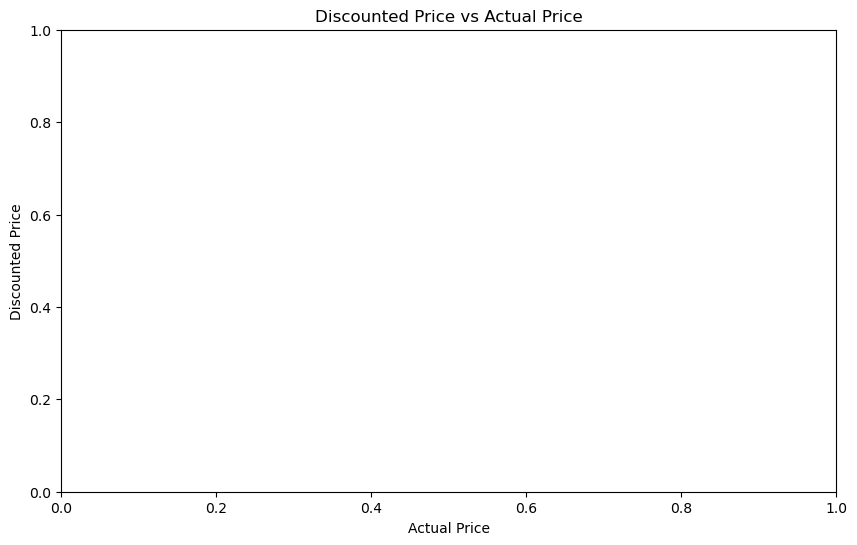


Average Discount Percentage by Category:
 Series([], Name: discount_percentage, dtype: float64)

Most Popular Product Names:
 Series([], Name: count, dtype: int64)

Most Popular Product Keywords:
 Series([], Name: count, dtype: int64)

Most Popular Product Reviews:
 Series([], dtype: int64)

Correlation between Discounted Price and Rating:
 nan

Top 5 Categories by Rating:
 Series([], Name: rating, dtype: float64)

Potential Areas for Improvement or Optimization:
- Explore potential pricing adjustments by analyzing the correlation between discounts and sales performance.
No categories available for visualization of top ratings.


In [8]:
# EDA-3

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset
data_path = r"D:\PW_SKILLS\Modules\Machine_Learning\Module_03\amazon.csv"
data = pd.read_csv(data_path)

# Display basic information about the dataset
print("Dataset Info:")
data.info()
print("\nFirst 5 Rows:\n", data.head())

# Clean and preprocess the data
data['discounted_price'] = pd.to_numeric(data['discounted_price'], errors='coerce')
data['actual_price'] = pd.to_numeric(data['actual_price'], errors='coerce')
data['discount_percentage'] = pd.to_numeric(data['discount_percentage'], errors='coerce')
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['rating_count'] = pd.to_numeric(data['rating_count'], errors='coerce')
data.dropna(subset=['category', 'discounted_price', 'actual_price', 'rating', 'rating_count'], inplace=True)

# 1. Average rating for each product category
avg_rating_by_category = data.groupby('category')['rating'].mean().sort_values(ascending=False)
print("\nAverage Rating by Category:\n", avg_rating_by_category)

# 2. Top rating_count products by category
top_rated_products = data.loc[data.groupby('category')['rating_count'].idxmax()]
print("\nTop Rating Count Products by Category:\n", top_rated_products[['category', 'product_name', 'rating_count']])

# 3. Distribution of discounted prices vs. actual prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_price', y='discounted_price', hue='category', data=data, legend='full')
plt.title('Discounted Price vs Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
if data['category'].nunique() > 0:
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 4. Average discount percentage across categories
avg_discount_by_category = data.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
print("\nAverage Discount Percentage by Category:\n", avg_discount_by_category)

# 5. Most popular product names
popular_products = data['product_name'].value_counts().head(10)
print("\nMost Popular Product Names:\n", popular_products)

# 6. Most popular product keywords
def extract_keywords(about_text):
    if isinstance(about_text, str):
        return about_text.lower().split()
    return []

keywords = data['about_product'].dropna().apply(extract_keywords).explode()
popular_keywords = keywords.value_counts().head(10)
print("\nMost Popular Product Keywords:\n", popular_keywords)

# 7. Most popular product reviews
popular_reviews = data.groupby('review_title').size().sort_values(ascending=False).head(10)
print("\nMost Popular Product Reviews:\n", popular_reviews)

# 8. Correlation between discounted_price and rating
correlation = data[['discounted_price', 'rating']].corr().loc['discounted_price', 'rating']
print("\nCorrelation between Discounted Price and Rating:\n", correlation)

# 9. Top 5 categories based on the highest ratings
top_categories_by_rating = avg_rating_by_category.head(5)
print("\nTop 5 Categories by Rating:\n", top_categories_by_rating)

# 10. Areas for improvement or optimization
print("\nPotential Areas for Improvement or Optimization:")
if data['discount_percentage'].isnull().any():
    print("- Some products are missing discount percentages. Consider reviewing this data.")
if data['rating'].isnull().any():
    print("- Missing ratings for certain products. Enhancing rating collection could provide more insights.")
if data['about_product'].isnull().any():
    print("- Missing descriptions for some products. Adding comprehensive descriptions can help attract customers.")

print("- Explore potential pricing adjustments by analyzing the correlation between discounts and sales performance.")

# Visualization for Top 5 Categories by Rating
if not top_categories_by_rating.empty:
    plt.figure(figsize=(10, 6))
    top_categories_by_rating.plot(kind='bar', color='skyblue')
    plt.title('Top 5 Categories by Average Rating')
    plt.ylabel('Average Rating')
    plt.xlabel('Category')
    plt.show()
else:
    print("No categories available for visualization of top ratings.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB

Duplicate rows found: 27 and dropping duplicates.


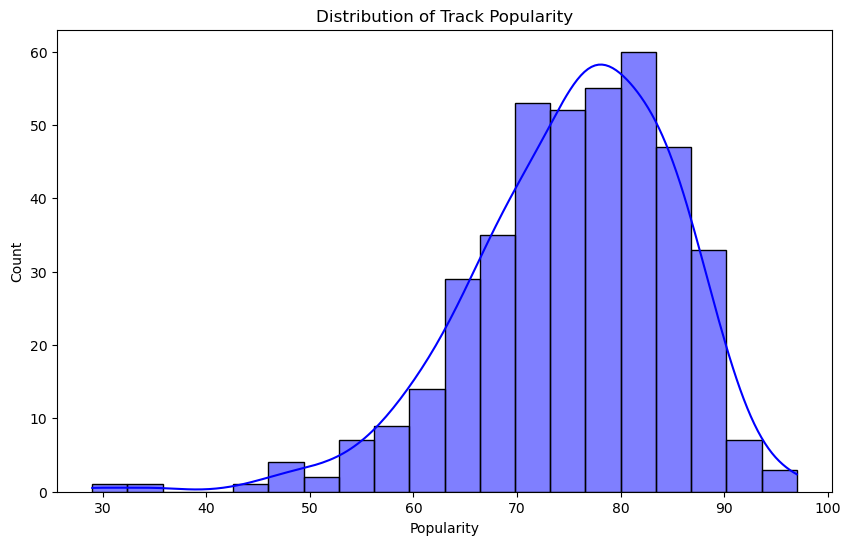

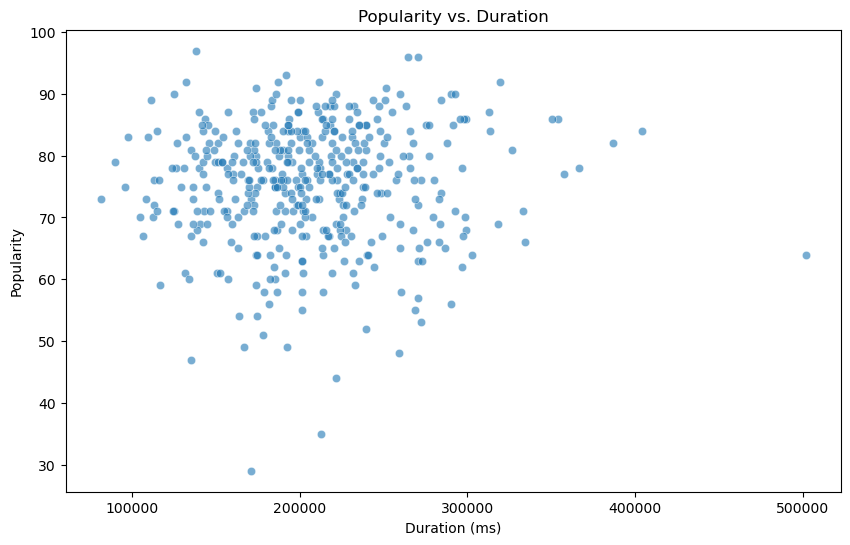

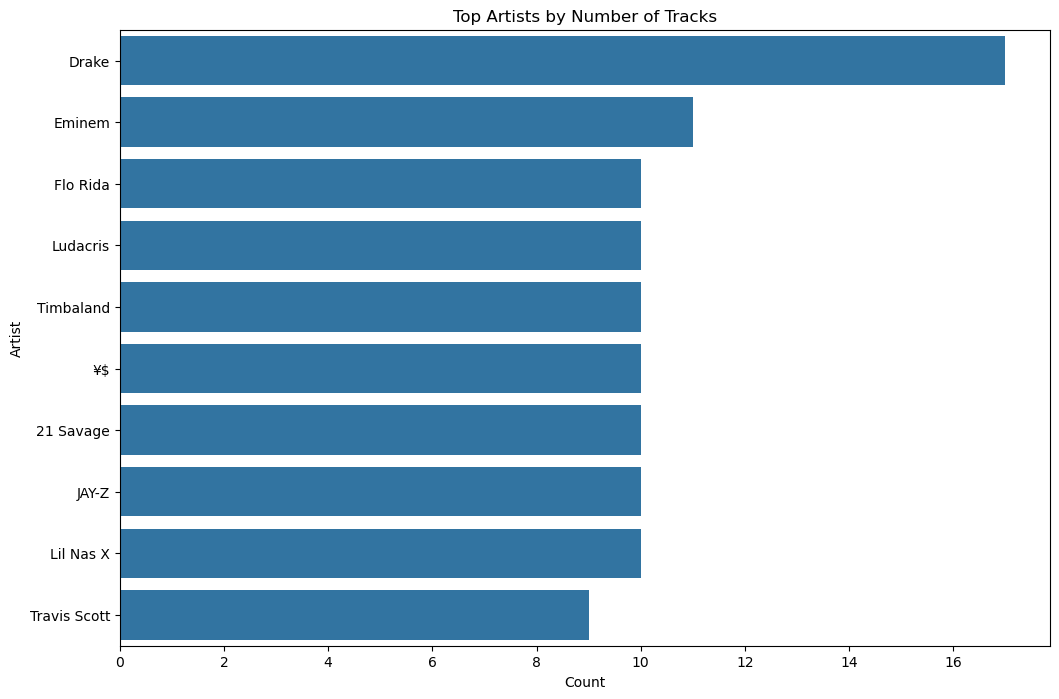


Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48

Top 5 Most Popular Artists by Average Popularity:
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64

Most Popular Tracks by Top 5 Artists:
cassö: Prada (Popularity: 92)
Trueno: Mamichula - con Nicki Nicole (Popularity: 89)
David Guetta: Baby Don't Hurt Me (Popularity: 87)
Travis Scott: FE!N (feat. Playboi Carti) (Popularity: 93)
¥$: CARNIVAL (Popularity: 96)


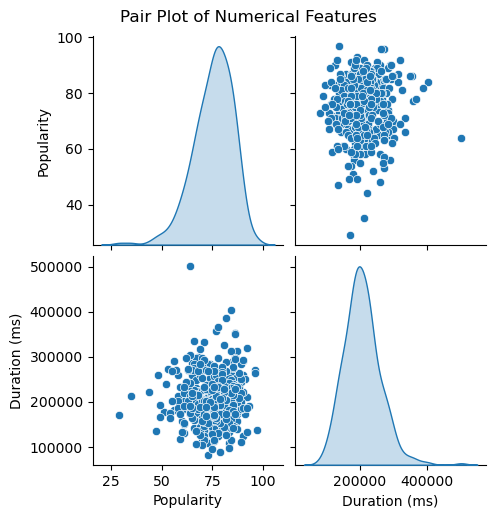

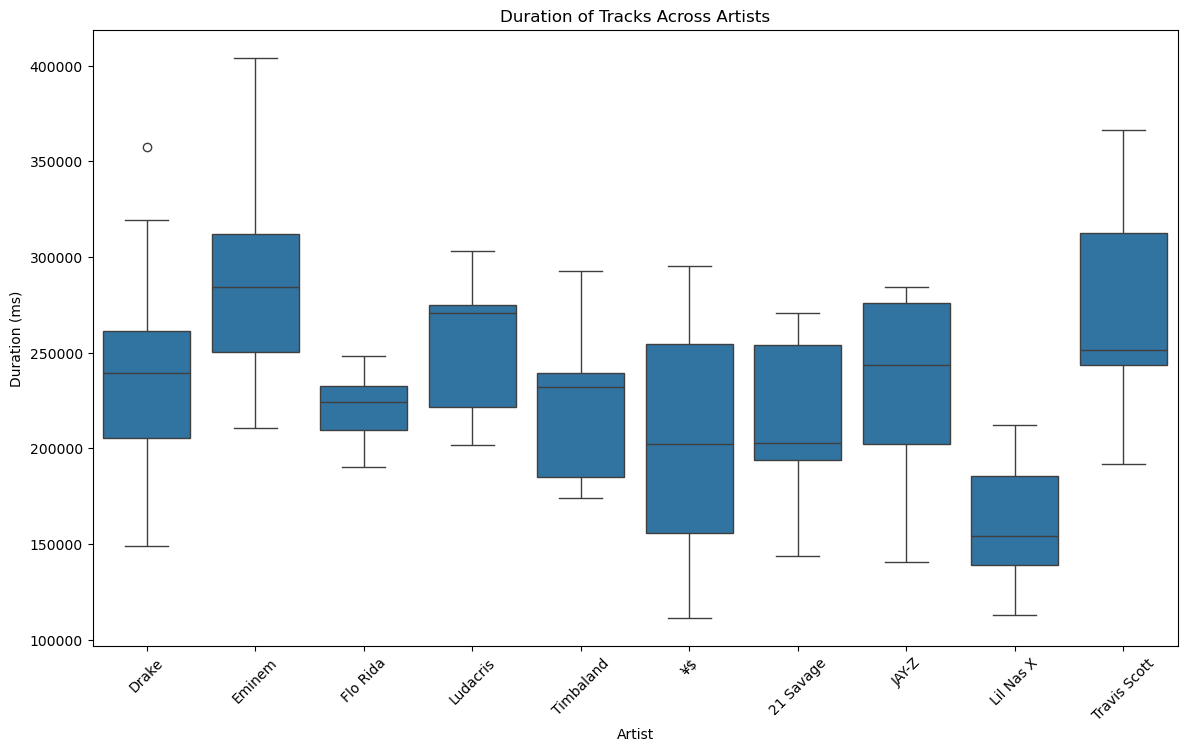

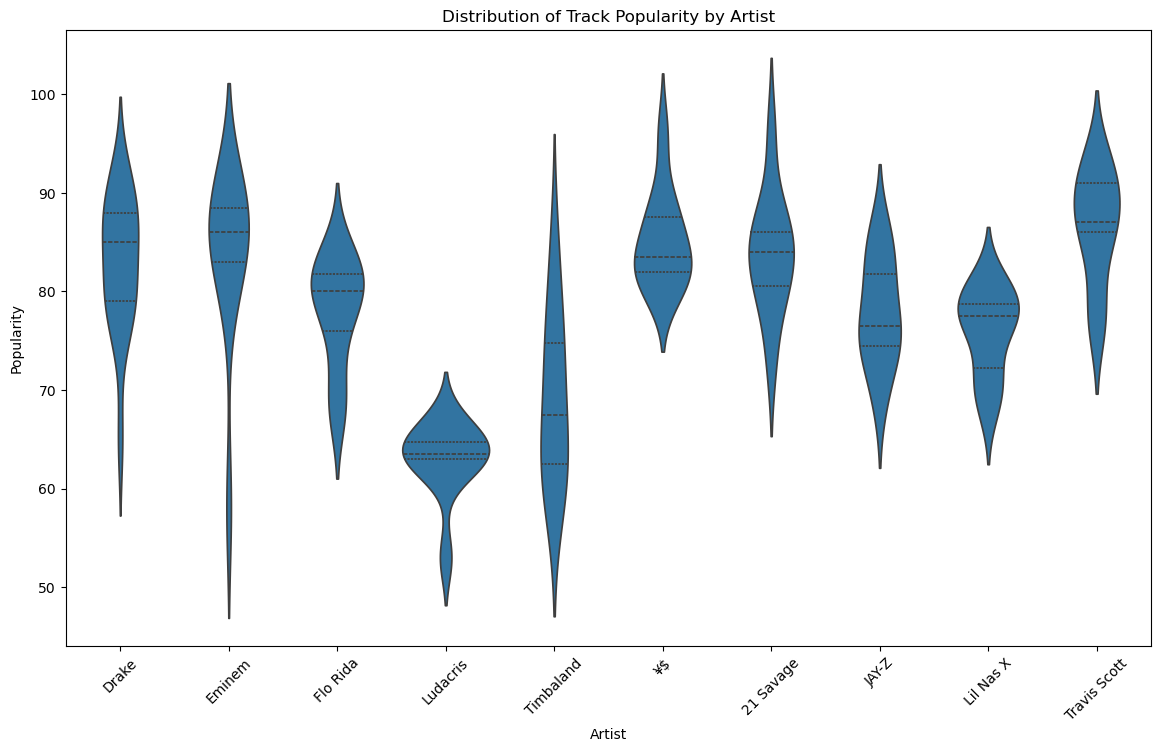

In [10]:
# EDA-4

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset
data_path = r"D:\PW_SKILLS\Modules\Machine_Learning\Module_03\spotify.csv"
df = pd.read_csv(data_path)

# 1. Basic cleaning and preprocessing
# Check for null values
df.info()
if df.isnull().sum().sum() > 0:
    print("\nNull values found and dropping rows with null values.")
    df.dropna(inplace=True)

# Check for duplicate rows
if df.duplicated().sum() > 0:
    print(f"\nDuplicate rows found: {df.duplicated().sum()} and dropping duplicates.")
    df.drop_duplicates(inplace=True)

# 2. Distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='blue')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

# 3. Relationship between popularity and duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df, alpha=0.6)
plt.title("Popularity vs. Duration")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()

# 4. Artist with the highest number of tracks
plt.figure(figsize=(12, 8))
sns.countplot(y='Artist', data=df, order=df['Artist'].value_counts().index[:10])
plt.title("Top Artists by Number of Tracks")
plt.xlabel("Count")
plt.ylabel("Artist")
plt.show()

# 5. Top 5 least popular tracks
least_popular_tracks = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("\nTop 5 Least Popular Tracks:")
print(least_popular_tracks)

# 6. Top 5 most popular artists (average popularity)
top_artists_avg_popularity = df.groupby('Artist')['Popularity'].mean().nlargest(5)
print("\nTop 5 Most Popular Artists by Average Popularity:")
print(top_artists_avg_popularity)

# 7. Most popular tracks for top 5 artists
most_popular_tracks_by_artist = {}
for artist in top_artists_avg_popularity.index:
    artist_tracks = df[df['Artist'] == artist].nlargest(1, 'Popularity')
    most_popular_tracks_by_artist[artist] = artist_tracks[['Track Name', 'Popularity']]

print("\nMost Popular Tracks by Top 5 Artists:")
for artist, tracks in most_popular_tracks_by_artist.items():
    print(f"{artist}: {tracks.values[0][0]} (Popularity: {tracks.values[0][1]})")

# 8. Pair plot for numerical variables
sns.pairplot(df[['Popularity', 'Duration (ms)']], diag_kind='kde', kind='scatter')
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

# 9. Duration variation across artists
plt.figure(figsize=(14, 8))
sns.boxplot(x='Artist', y='Duration (ms)', data=df, order=df['Artist'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title("Duration of Tracks Across Artists")
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.show()

# 10. Distribution of track popularity by artist
plt.figure(figsize=(14, 8))
sns.violinplot(x='Artist', y='Popularity', data=df, order=df['Artist'].value_counts().index[:10], inner='quartile')
plt.xticks(rotation=45)
plt.title("Distribution of Track Popularity by Artist")
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.show()